In [1]:
install.packages('FactoMineR')

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/FactoMineR_2.8.tar.gz' ...
	OK [downloaded 3.6 Mb in 1.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/cluster_2.1.4.tar.gz' ...
	OK [downloaded 625.5 Kb in 0.2 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/ellipse_0.5.0.tar.gz' ...
	OK [downloaded 211.2 Kb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/emmeans_1.8.7.tar.gz' ...
	OK [downloaded 2 Mb in 0.9 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/estimability_1.4.1.tar.gz' ...
	OK [downloaded 39.6 Kb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/flashClust_1.01-2.tar.gz' ...
	OK [downloaded 23.8 Kb in 0.7 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/leaps_3.1.ta

In [2]:
table <- read.table('new-data.csv',sep=',', header=TRUE, dec='.')
head(table)
summary(table)

,Id,Depth,Depth2,Name,Long,Lat,Shore.distance
,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>
1,0,1029.0,1025.775,Globicephala macrorhynchus,-16.69158,27.96593,3636
2,1,905.0,1232.125,Globicephala macrorhynchus,-18.03670,27.63775,2882
3,2,1468.5,1459.475,Globicephala macrorhynchus,-16.83167,28.08167,6679
4,3,1795.0,1835.425,Globicephala macrorhynchus,-17.16700,27.95033,8748
5,4,1803.0,1821.075,Globicephala macrorhynchus,-17.21733,27.91733,11677
6,5,1260.0,1320.625,Globicephala macrorhynchus,-17.28017,27.96350,6914


       Id             Depth            Depth2            Name          
 Min.   :  0.00   Min.   : -57.0   Min.   : -23.78   Length:449        
 1st Qu.: 37.00   1st Qu.: 310.4   1st Qu.: 364.80   Class :character  
 Median : 74.00   Median : 867.5   Median : 911.58   Mode  :character  
 Mean   : 77.99   Mean   : 957.3   Mean   : 985.32                     
 3rd Qu.:113.00   3rd Qu.:1448.6   3rd Qu.:1482.28                     
 Max.   :190.00   Max.   :3607.2   Max.   :3607.00                     
      Long             Lat        Shore.distance  
 Min.   :-18.87   Min.   :25.55   Min.   :   -35  
 1st Qu.:-16.89   1st Qu.:27.70   1st Qu.:  3012  
 Median :-15.82   Median :27.88   Median :  8169  
 Mean   :-16.06   Mean   :28.01   Mean   : 12981  
 3rd Qu.:-15.67   3rd Qu.:28.05   3rd Qu.: 12284  
 Max.   :-13.25   Max.   :31.97   Max.   :284663  

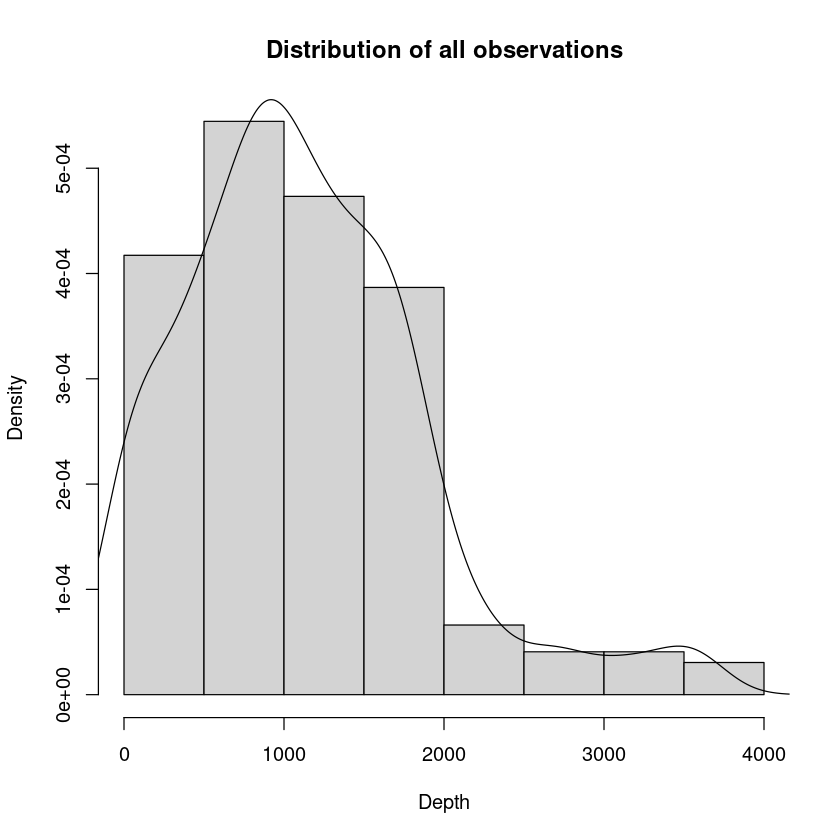

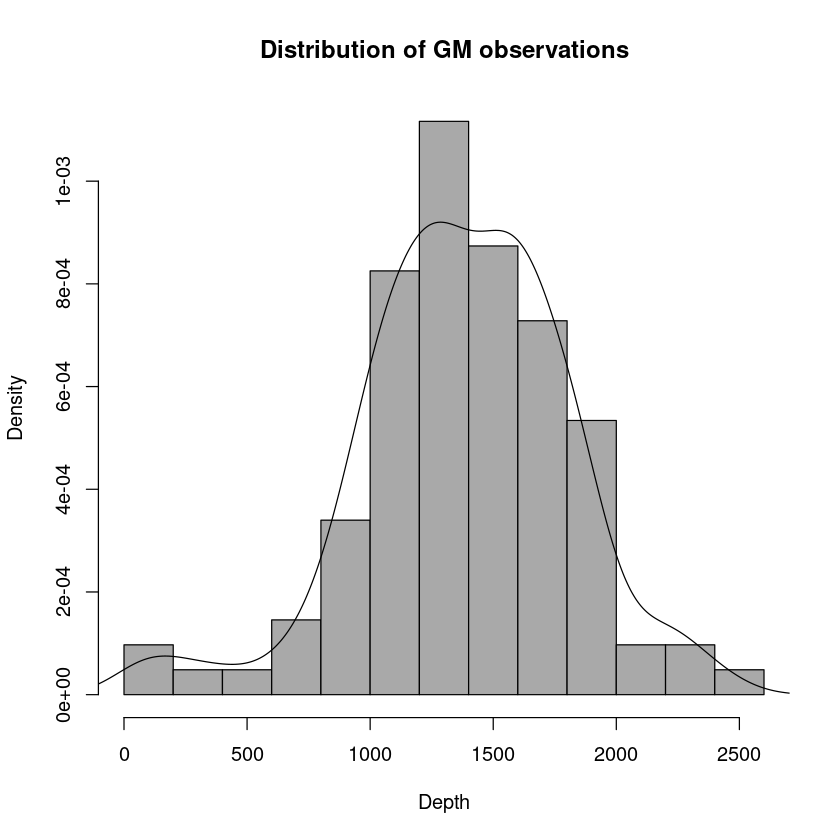

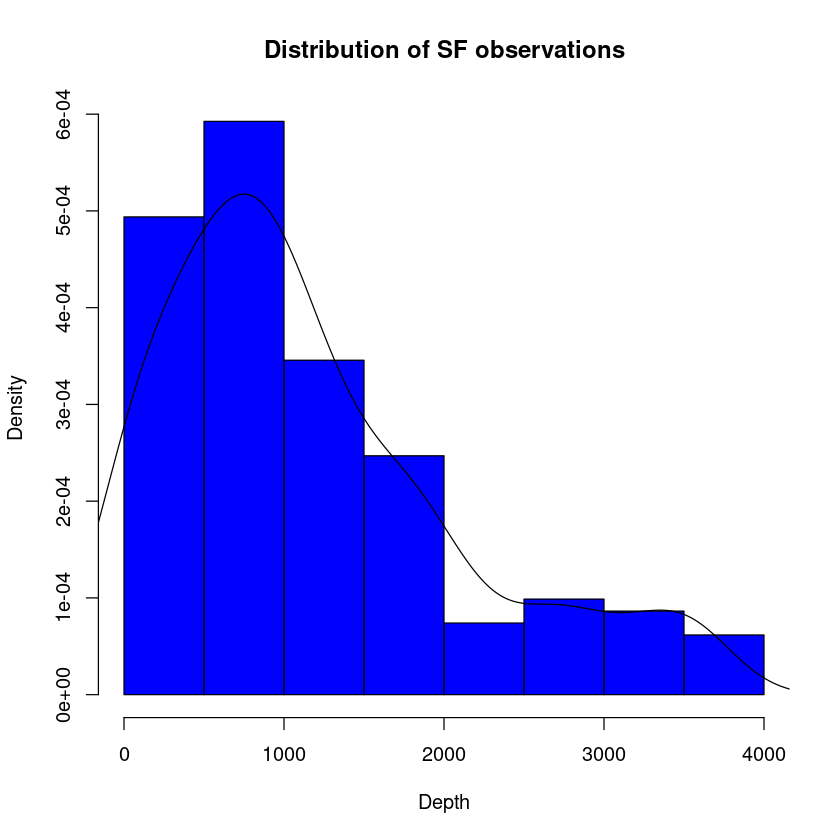

                            
                             <500 500-1000 1000-1500 1500-2000 >2000
  Globicephala macrorhynchus    5       10        46        38     5
  Stenella frontalis           41       48        28        20    26
  Tursiops truncatus           38       49        19        18     4

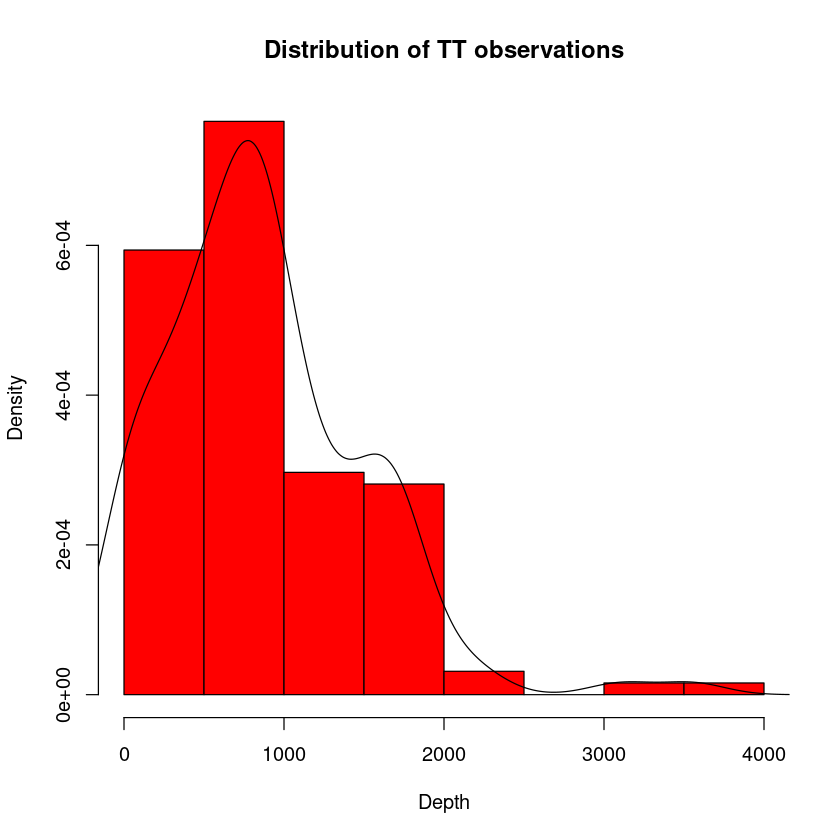

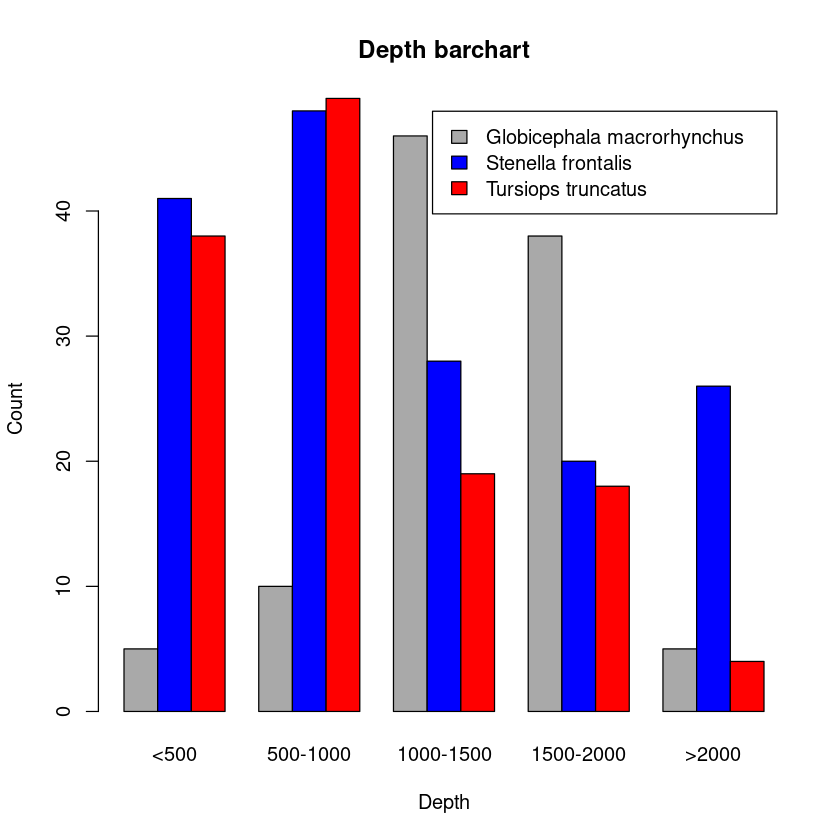

In [12]:
df <- data.frame(table$Name,table$Depth2)
colnames(df) = c('species','depth')


hist(df$depth[df$depth>0],nclass=10,freq=FALSE, main='Distribution of all observations', xlab='Depth')
lines(density(df$depth[df$depth>0]))

hist(df$depth[df$depth>0 & df$species=='Globicephala macrorhynchus'], nclass=10, freq=FALSE, col='darkgrey', main='Distribution of GM observations', xlab='Depth')
lines(density(df$depth[df$depth>0 & df$species=='Globicephala macrorhynchus']))

hist(df$depth[df$depth>0 & df$species=='Stenella frontalis'], nclass=10, freq=FALSE, col='blue', main='Distribution of SF observations', xlab='Depth')
lines(density(df$depth[df$depth>0 & df$species=='Stenella frontalis']))

hist(df$depth[df$depth>0 & df$species=='Tursiops truncatus'],nclass=10,freq=FALSE, col='red', main='Distribution of TT observations', xlab='Depth')
lines(density(df$depth[df$depth>0 & df$species=='Tursiops truncatus']))

#decoupe = quantile(df$depth,probs=seq(0,1,0.20))
#df$cat_depth = cut(df$depth,breaks=decoupe,include.lowest = TRUE)

df$cat_depth = cut(df$depth,breaks=c(0,500,1000,1500,2000,max(df$depth)),include.lowest = TRUE,labels = c('<500','500-1000','1000-1500','1500-2000','>2000'))


tbl_cont <- table(df$species,df$cat_depth)
tbl_cont

barplot(tbl_cont,
        main = "Depth barchart",
        xlab = "Depth", ylab = "Count",
        col = c("darkgrey", "blue", "red"),
        legend.text = rownames(tbl_cont),
        beside = TRUE) # Grouped bars


## Chi2 test


In [8]:
#tbl_cont <- table(df$species[df$species == "Stenella frontalis"], df$cat_depth[df$species == "Stenella frontalis"])

print("Observed values")
table_sum <- addmargins(tbl_cont, FUN = sum)      
table_sum

resultat = chisq.test(tbl_cont)
resultat

print("Expected values")
round(resultat$expected, 1)

print("Contributions")
round(100 * resultat$residuals^2 / resultat$statistic, 1)

print("Residuals")
round(resultat$residuals, 3)

[1] "Observed values"
Margins computed over dimensions
in the following order:
1: 
2: 


,<500,500-1000,1000-1500,1500-2000,>2000,sum
Globicephala macrorhynchus,5,10,46,38,5,104
Stenella frontalis,41,48,28,20,26,163
Tursiops truncatus,38,49,19,18,4,128
sum,84,107,93,76,35,395



	Pearson's Chi-squared test

data:  tbl_cont
X-squared = 100.48, df = 8, p-value < 2.2e-16


[1] "Expected values"


,<500,500-1000,1000-1500,1500-2000,>2000
Globicephala macrorhynchus,22.1,28.2,24.5,20.0,9.2
Stenella frontalis,34.7,44.2,38.4,31.4,14.4
Tursiops truncatus,27.2,34.7,30.1,24.6,11.3


[1] "Contributions"


                            
                             <500 500-1000 1000-1500 1500-2000 >2000
  Globicephala macrorhynchus 13.2     11.7      18.8      16.1   1.9
  Stenella frontalis          1.2      0.3       2.8       4.1   9.2
  Tursiops truncatus          4.2      5.9       4.1       1.8   4.7

[1] "Residuals"


                            
                               <500 500-1000 1000-1500 1500-2000  >2000
  Globicephala macrorhynchus -3.640   -3.424     4.348     4.022 -1.389
  Stenella frontalis          1.076    0.579    -1.675    -2.029  3.041
  Tursiops truncatus          2.066    2.433    -2.029    -1.336 -2.180

## AFC


Call:
CA(X = tbl_cont) 

The chi square of independence between the two variables is equal to 100.4762 (p-value =  3.411921e-18 ).

Eigenvalues
                      Dim.1  Dim.2
Variance               0.21   0.04
% of var.             83.93  16.07
Cumulative % of var.  83.93 100.00

Rows
                             Iner*1000    Dim.1    ctr   cos2    Dim.2    ctr
Globicephala macrorhynchus |    156.89 |  -0.77  73.44   1.00 |  -0.02   0.23
Stenella frontalis         |     44.72 |   0.25  12.00   0.57 |   0.22  46.74
Tursiops truncatus         |     52.76 |   0.31  14.56   0.59 |  -0.26  53.03
                             cos2  
Globicephala macrorhynchus   0.00 |
Stenella frontalis           0.43 |
Tursiops truncatus           0.41 |

Columns
                             Iner*1000   Dim.1   ctr  cos2   Dim.2   ctr  cos2
<500                       |     47.28 |  0.47 21.72  0.98 | -0.06  2.19  0.02
500-1000                   |     45.51 |  0.39 19.57  0.92 | -0.12  9.10  0.08
1000-15

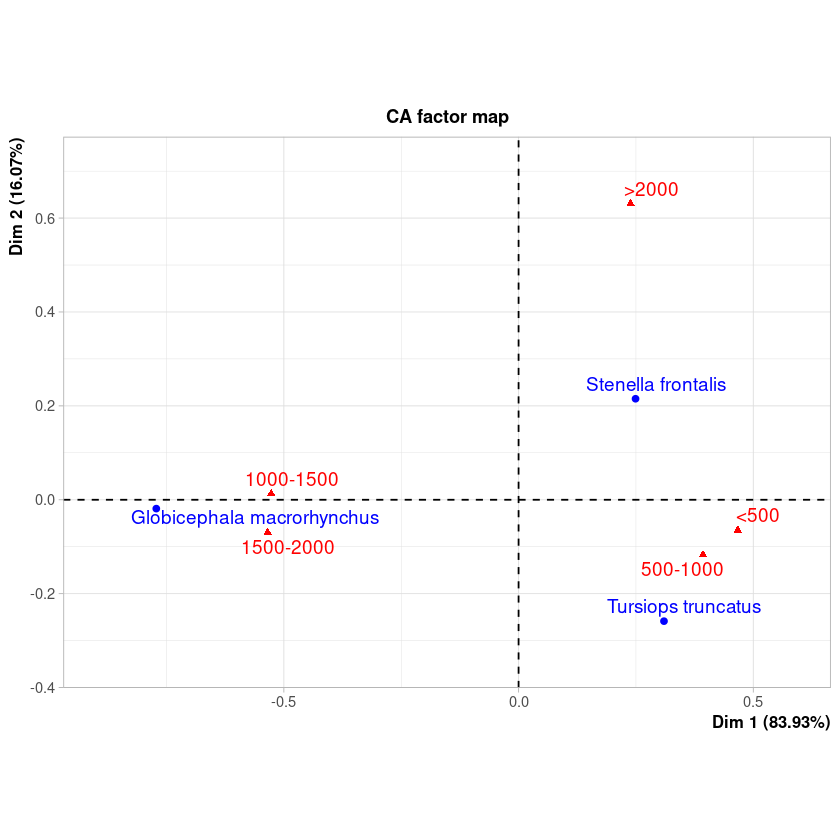

In [5]:
library(FactoMineR)
res.ca <- CA(tbl_cont)
summary(res.ca, nb.dec = 2, ncp = 2, nbelements = 5)